In [502]:
import pandas as pd
import re #정규표현식 전처리
import matplotlib.pyplot as plt #시각화

In [ ]:
from matplotlib import font_manager, rc #한글폰트
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [180]:
channel = pd.read_csv("C:\\Users\\userpc\\00_Data\\LG\\2. 데이터 전처리\\channel_pgm.csv",
                     encoding='cp949', index_col=0)

In [181]:
channel.reset_index(drop=True, inplace=True)

In [182]:
channel.head()

,subsr,chnl_nm,use_tms,pgm_nm,SMRY,ACTR_DISP,datetime,day,hour
0,65062000,무비플러스,4,무비플러스 가격인하,NaN,NaN,2024-01-06 09:20:47,6,9
1,60156000,무비플러스,5,무비플러스 가격인하,NaN,NaN,2024-01-06 20:19:34,6,20
2,66277000,무비플러스,13,무비플러스 가격인하,NaN,NaN,2024-01-06 20:09:56,6,20
3,64005000,무비플러스,1,무비플러스 가격인하,NaN,NaN,2024-01-06 20:26:58,6,20
4,65263000,무비플러스,6,무비플러스 가격인하,NaN,NaN,2024-01-06 05:00:57,6,5


# 데이터 전처리

### 1. 시청 시간이 1분 미만인 데이터 삭제

In [183]:
drop_1m_channel = channel[channel['use_tms'] < 60]
drop_1m_channel

,subsr,chnl_nm,use_tms,pgm_nm,SMRY,ACTR_DISP,datetime,day,hour
0,65062000,무비플러스,4,무비플러스 가격인하,NaN,NaN,2024-01-06 09:20:47,6,9
1,60156000,무비플러스,5,무비플러스 가격인하,NaN,NaN,2024-01-06 20:19:34,6,20
2,66277000,무비플러스,13,무비플러스 가격인하,NaN,NaN,2024-01-06 20:09:56,6,20
3,64005000,무비플러스,1,무비플러스 가격인하,NaN,NaN,2024-01-06 20:26:58,6,20
4,65263000,무비플러스,6,무비플러스 가격인하,NaN,NaN,2024-01-06 05:00:57,6,5
...,...,...,...,...,...,...,...,...,...
74189,65129000,롯데홈쇼핑,7,김나운의 요리조리,NaN,NaN,2024-01-31 06:47:25,31,6
74190,64448000,롯데홈쇼핑,40,김나운의 요리조리,NaN,NaN,2024-01-31 22:12:22,31,22
74192,65955000,이벤트TV,8,유찬의 가요를 부탁해(129회),NaN,NaN,2024-01-31 20:01:17,31,20
74193,62769000,이벤트TV,0,유찬의 가요를 부탁해(129회),NaN,NaN,2024-01-31 20:39:01,31,20


아니 5만개나 되면 어쩌자는거야

In [184]:
# 원본에서 삭제
channel = channel.drop(drop_1m_channel.index, axis=0)

In [185]:
# 인덱스 초기화
channel.reset_index(drop=True, inplace=True)

In [186]:
channel.head()

,subsr,chnl_nm,use_tms,pgm_nm,SMRY,ACTR_DISP,datetime,day,hour
0,65431000,시네마천국,1264,아기공룡 둘리 : 얼음별 대모험 ...,우리나라 만화계의 독보적인 캐릭터 [아기공룡 둘리]의 활약이 코믹하게 묘사된 극장용...,박영남,2024-01-06 10:31:24,6,10
1,60510000,OCN,4433,데시벨,도심 한복판에서 벌어지는 사운드 테러 액션 오늘 반드시 이 폭발을 막아야만 한다!,"김래원,이종석",2024-01-06 18:21:30,6,18
2,61488000,OCN,137,데시벨,도심 한복판에서 벌어지는 사운드 테러 액션 오늘 반드시 이 폭발을 막아야만 한다!,"김래원,이종석",2024-01-06 18:52:12,6,18
3,63352000,OCN무비즈,801,라이언 일병 구하기,NaN,"톰 행크스,맷 데이먼,에드워드 번즈",2024-01-06 20:42:39,6,20
4,65062000,OCN무비즈,100,라이언 일병 구하기,NaN,"톰 행크스,맷 데이먼,에드워드 번즈",2024-01-06 22:38:23,6,22


### 2. 표시가 다른 같은 프로그램 일원화

In [187]:
channel['pgm_nm']

0        아기공룡 둘리 : 얼음별 대모험 ...
1                          데시벨
2                          데시벨
3                   라이언 일병 구하기
4                   라이언 일병 구하기
                 ...          
23371             소문난 건강법(35회)
23372             소문난 건강법(35회)
23373             소문난 건강법(35회)
23374                김나운의 요리조리
23375               선정적 문구 차단중
Name: pgm_nm, Length: 23376, dtype: object

In [188]:
# 프로그램 이름 정규화 함수
def normalize_program_name(name):
    # 회차 제거 (모범택시 2(10회) -> 모범택시 2)
    name = re.sub(r'\(\d+회\)', '', name)
    # 대괄호 제거 ([설 특집 영화]비공식작전 -> 비공식작전)
    name = re.sub(r'\[.*?\]', '', name).strip()
    return name

In [189]:
# 프로그램 이름 정규화 적용
channel['pgm_nm'] = channel['pgm_nm'].apply(normalize_program_name)

In [178]:
channel[channel['pgm_nm'].str.contains('설 특집')

,subsr,chnl_nm,use_tms,pgm_nm,SMRY,ACTR_DISP,datetime,day,hour,category,normalized_program


# 데이터 탐색

### 1. 가장 많이 시청한 카테고리, 채널

In [190]:
# 채널 카테고리 분류
category_map = {
    '지상파/종편' : ['KBS1', 'KBS2', 'MBC', 'SBS', 'JTBC', 'TV조선', 'MBN', 'EBS플러스2'],
    '지역채널' : ['OBS', 'OBS W', 'CJB', 'JTV', 'TJB', 'KNN', 'KBC', 'TBC', 'tbsTV', 'G1'],
    '뉴스': ['BBC뉴스', 'CNN', '이데일리TV', 'CTS', '채널뷰', '블룸버그TV'],
    '스포츠': ['KBS스포츠', '골프&PBA', '스포골프헬스', '스크린골프존','스포 프라임2', '스포티비온2', '스포티비프라임', 'SBS골프', 'SBS골프2', 'SBS스포츠', 'J골프&스포츠', 'JTBC골프', 
            'MBC스포츠', '스카이스포츠', '유로스포츠', '빌리어즈TV','IB스포츠'],
    '여성/홈쇼핑' : ['ENA스토리', 'tvN스토리', 'KBS스토리', 'JTBC4', 'CJ온스타일+', '롯데홈쇼핑', 'GS SHOP', 'NS홈쇼핑', '라이프타임','동아TV','패션N'],
    '예능' : ['ENA플레이', 'SBS플러스', '채널와이드', '채널MX', '채널S', '채널S플러스', 'E채널', '코미디TV','더라이프', 'iHQ'],
    '영화/드라마' : ['ENA', 'Dramax', 'OCN', 'OCN무비즈', 'OCN무비즈2', '채널나우', '채널에버', '채널액션', '월드클래식무비', 
                '캐치온1', '캐치온2', '더무비', '디스토리', '엠플렉스', '아시아 M', 'AXN', '시네마천국', '스크린', '무비플러스',
               '씨네프', 'CNTV',],
    '정치': ['국회방송', '국방TV', 'KTV'],
    '취미/음악' : ['국악방송', 'K바둑', '바둑TV', 'GMTV','폴라리스TV','아이넷','FTV', '이벤트TV', 'OGN'], 
    '키즈': ['대교노리Q', '더키즈', '부메랑', '애니맥스', '애니박스', '애니원', '애니플러스', '카툰네트워크', '투니버스', 
                  '브라보키즈', '어린이TV', '샌드박스+', '재능방송'],
    '종교' : ['BBS불교방송', '가톨릭평화방송', 'STB상생방송', '원음방송', '인디필름','CBS'],
    '해외': ['중화TV', '채널J', 'NHK월드재팬', '채널차이나', 'NHK프리미엄', '아시아N', 'VIKI'],
    '성인' : ['미드나잇', '디자이어TV', '플레이보이TV', '핑크하우스']
}

In [191]:
# 채널 이름에 해당하는 카테고리를 찾는 함수
def find_category(channel_name):
    for category, channels in category_map.items():
        if channel_name in channels:
            return category
    return '기타'  # 카테고리 맵에 없는 채널의 경우 '기타'로 분류

In [192]:
# 'channel' DataFrame에 'Category' 컬럼 추가
channel['category'] = channel['chnl_nm'].apply(find_category)

#### channel_1 : 카테고리와 채널만 가져다놓은 DF

In [193]:
channel_1 = channel[['category', 'chnl_nm']]
channel_1

,category,chnl_nm
0,영화/드라마,시네마천국
1,영화/드라마,OCN
2,영화/드라마,OCN
3,영화/드라마,OCN무비즈
4,영화/드라마,OCN무비즈
...,...,...
23371,지상파/종편,TV조선
23372,지상파/종편,TV조선
23373,지상파/종편,TV조선
23374,여성/홈쇼핑,롯데홈쇼핑


In [194]:
channel_1.category.value_counts()

영화/드라마       13497
지상파/종편        2322
여성/홈쇼핑        1758
취미/음악         1258
종교            1064
스포츠           1007
예능             779
해외             611
어린이 및 패밀리      491
지역채널           197
성인             174
기타             114
뉴스              82
정치              22
Name: category, dtype: int64

In [539]:
channel_1[channel_1['category']=='영화/드라마'].value_counts()

category  chnl_nm
영화/드라마    OCN무비즈2    1821
          OCN        1773
          OCN무비즈     1472
          엠플렉스       1423
          더무비        1355
          스크린        1264
          AXN        1063
          아시아 M       768
          시네마천국       658
          채널액션        467
          채널나우        356
          월드클래식무비     334
          씨네프         327
          무비플러스       142
          CNTV        113
          캐치온2         89
          캐치온1         48
          디스토리         15
          ENA           6
          Dramax        2
          채널에버          1
dtype: int64

### 2. 가장 많이 본 프로그램

In [380]:
# 전체 채널에서 가장 많이 본 프로그램 30개
channel['pgm_nm'].value_counts().head(10)

낭만닥터 김사부               1074
모범택시 2                  922
비공식작전                   562
미스터 션샤인                 544
소문난 건강법                 516
제25회 농심신라면배 세계바둑최강전     408
스파이                     389
푸른백세 어영차 바다야            356
타짜                      300
런던 해즈 폴른                282
Name: pgm_nm, dtype: int64

In [377]:
# 리스트로 만듦
top_30_pgm = channel['pgm_nm'].value_counts().head(10).index

In [378]:
# 프로그램이 있는 데이터만 뽑아서 데이터프레임 생성
top_30_pgm_channel = channel[channel['pgm_nm'].isin(top_30_pgm)]

In [379]:
# 중복 제거하고 [[카테고리, 채널이름, 프로그램이름]]만 뽑아서 보여주기
top_30_pgm_channel.drop_duplicates(subset=['pgm_nm', 'chnl_nm', 'category'])[['category', 'chnl_nm', 'pgm_nm']]

,category,chnl_nm,pgm_nm
11,영화/드라마,AXN,낭만닥터 김사부
14,지상파/종편,TV조선,소문난 건강법
39,지상파/종편,MBC,푸른백세 어영차 바다야
130,영화/드라마,OCN무비즈2,스파이
160,영화/드라마,AXN,모범택시 2
218,여성/홈쇼핑,ENA스토리,모범택시 2
377,영화/드라마,OCN무비즈,스파이
456,영화/드라마,OCN,스파이
464,예능,SBS플러스,모범택시 2
646,영화/드라마,OCN무비즈2,타짜


In [204]:
#'영화/드라마' 채널에서 가장 많이 본 프로그램 10개
channel[channel.category=='영화/드라마']['pgm_nm'].value_counts().head(10)

낭만닥터 김사부    734
스파이         389
비공식작전       388
모범택시 2      329
타짜          300
런던 해즈 폴른    282
언포게터블       264
더 이퀄라이저     236
황해          207
리볼버         198
Name: pgm_nm, dtype: int64

### 3. 가장 오래 시청한 채널, 프로그램

In [368]:
channel_3 = channel[['category', 'chnl_nm', 'pgm_nm', 'use_tms']]
channel_3.head()

,category,chnl_nm,pgm_nm,use_tms
0,영화/드라마,시네마천국,아기공룡 둘리 : 얼음별 대모험 ...,1264
1,영화/드라마,OCN,데시벨,4433
2,영화/드라마,OCN,데시벨,137
3,영화/드라마,OCN무비즈,라이언 일병 구하기,801
4,영화/드라마,OCN무비즈,라이언 일병 구하기,100


In [337]:
# 프로그램 이름으로 그룹화
group_pgm = channel_3.groupby('pgm_nm')

# 각 프로그램별 사용 시간 합계, 내림차순 정렬
for program_name, group_data in group_pgm:
    result = group_pgm['use_tms'].agg(['sum', 'mean']).reset_index()
    result_sorted = result.sort_values(by='sum', ascending=False)

In [375]:
result_sum_sorted.head(10)

,pgm_nm,sum,mean
134,낭만닥터 김사부,1962839,1827.596834
215,모범택시 2,1567880,1700.520607
226,미스터 션샤인,1125522,2068.974265
302,소문난 건강법,832562,1613.492248
263,비공식작전,748325,1331.539146
514,푸른백세 어영차 바다야,609362,1711.691011
437,제25회 농심신라면배 세계바둑최강전,567675,1391.360294
314,스파이,542681,1395.066838
417,유찬의 가요를 부탁해,501978,2804.346369
185,런던 해즈 폴른,476894,1691.113475


- mean이 상대적으로 작으면 : 여러 사람이 시청
- mean이 상대적으로 크면 : 한 사람이 많이 시청

In [376]:
# 채널 이름으로 그룹화
group_chnl = channel_3.groupby('chnl_nm')

# 각 채널별사용 횟수의 합계, category 컬럼 첫 번째 값
group_chnl = group_chnl.agg({
    'use_tms': 'sum',
    'category': 'first'
}).sort_values(by='use_tms', ascending=False).head(10)

group_chnl

,use_tms,category
chnl_nm,,
OCN,2895280,영화/드라마
OCN무비즈2,2320074,영화/드라마
OCN무비즈,2074199,영화/드라마
더무비,1853477,영화/드라마
스크린,1720695,영화/드라마
AXN,1692700,영화/드라마
엠플렉스,1677235,영화/드라마
TV조선,1427113,지상파/종편
tvN스토리,1335958,여성/홈쇼핑


### 4. 가장 인기있었던 배우

In [398]:
channel_4 = channel['ACTR_DISP']
channel_4

0                        박영남
1                    김래원,이종석
2                    김래원,이종석
3        톰 행크스,맷 데이먼,에드워드 번즈
4        톰 행크스,맷 데이먼,에드워드 번즈
                ...         
23371                    NaN
23372                    NaN
23373                    NaN
23374                    NaN
23375                    NaN
Name: ACTR_DISP, Length: 23376, dtype: object

In [406]:
# 컴마로 구분된 문자열 리스트 변환
channel_4 = channel['ACTR_DISP'].str.split(',')
channel_4

0                          [박영남]
1                     [김래원, 이종석]
2                     [김래원, 이종석]
3        [톰 행크스, 맷 데이먼, 에드워드 번즈]
4        [톰 행크스, 맷 데이먼, 에드워드 번즈]
                  ...           
23371                        NaN
23372                        NaN
23373                        NaN
23374                        NaN
23375                        NaN
Name: ACTR_DISP, Length: 23376, dtype: object

In [408]:
# 이름별로 개별 행 생성
expanded_names = channel_4.explode()
expanded_names

0        박영남
1        김래원
1        이종석
2        김래원
2        이종석
        ... 
23371    NaN
23372    NaN
23373    NaN
23374    NaN
23375    NaN
Name: ACTR_DISP, Length: 85185, dtype: object

In [414]:
# 이름 언급 빈도 수 계산
name_counts = expanded_names.value_counts()
name_counts.head(10)

장혁진     1996
유연석     1695
김의성     1582
주현      1159
한석규     1135
양세종     1074
서...    1074
변우민     1074
최진호     1074
김홍파     1074
Name: ACTR_DISP, dtype: int64

In [431]:
# 무슨 프로그램에 나왔는지 확인
print(channel[channel['ACTR_DISP'].str.contains('장혁진', na=False)].pgm_nm.unique())
print(channel[channel['ACTR_DISP'].str.contains('유연석', na=False)].pgm_nm.unique())
print(channel[channel['ACTR_DISP'].str.contains('김의성', na=False)].pgm_nm.unique())
print(channel[channel['ACTR_DISP'].str.contains('주현', na=False)].pgm_nm.unique())
print(channel[channel['ACTR_DISP'].str.contains('한석규', na=False)].pgm_nm.unique())

['낭만닥터 김사부' '모범택시 2']
['낭만닥터 김사부' '그날의 분위기' '늑대소년' '미스터 션샤인']
['모범택시 2' '빅매치' '신년특선 OBS 시네마 빅매치' '빅매치 2부' '미스터 션샤인' '빅매치 1부']
['낭만닥터 김사부' '조폭 마누라 2' '조폭 마누라2-돌아온전설']
['낭만닥터 김사부' '접속 2부' '닥터봉' '접속 1부' '8월의 크리스마스' '닥터 봉']


### 5. 시간대별 채널 시청

In [434]:
channel_5 = channel[['category', 'chnl_nm', 'hour']]
channel_5

,category,chnl_nm,hour
0,영화/드라마,시네마천국,10
1,영화/드라마,OCN,18
2,영화/드라마,OCN,18
3,영화/드라마,OCN무비즈,20
4,영화/드라마,OCN무비즈,22
...,...,...,...
23371,지상파/종편,TV조선,18
23372,지상파/종편,TV조선,20
23373,지상파/종편,TV조선,19
23374,여성/홈쇼핑,롯데홈쇼핑,20


In [488]:
channel_5.iloc[979]

category      종교
chnl_nm     인디필름
hour          14
Name: 979, dtype: object

In [439]:
channel_5_group = channel_5.groupby(['hour'])

In [447]:
channel_5_group.size()

hour
0      673
1     1135
2      833
3      878
4      607
5      852
6      733
7      579
8      799
9      901
10     918
11    1256
12     716
13     757
14     778
15    1071
16    1088
17    1196
18    1317
19    1201
20    1408
21    1514
22    1199
23     967
dtype: int64

In [493]:
counts1 = channel_5[channel_5['category'] == '영화/드라마']['hour'].value_counts().sort_index()
counts2 = channel_5[channel_5['category'] == '지상파/종편']['hour'].value_counts().sort_index()
counts3 = channel_5[channel_5['category'] == '여성/홈쇼핑']['hour'].value_counts().sort_index()
counts4 = channel_5[channel_5['category'] == '취미/음악']['hour'].value_counts().sort_index()
counts5 = channel_5[channel_5['category'] == '종교']['hour'].value_counts().sort_index()


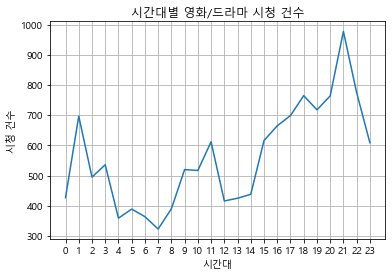

In [504]:
plt.plot(counts.index, counts.values)
plt.title('시간대별 영화/드라마 시청 건수')
plt.xlabel('시간대')
plt.ylabel('시청 건수')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [515]:
counts1 = channel_5[channel_5['category'] == '영화/드라마']['hour'].value_counts().sort_index()
counts2 = channel_5[channel_5['category'] == '지상파/종편']['hour'].value_counts().sort_index()
counts3 = channel_5[channel_5['category'] == '여성/홈쇼핑']['hour'].value_counts().sort_index()
counts4 = channel_5[channel_5['category'] == '취미/음악']['hour'].value_counts().sort_index()
counts5 = channel_5[channel_5['category'] == '종교']['hour'].value_counts().sort_index()
counts6 = channel_5[channel_5['category'] == '스포츠']['hour'].value_counts().sort_index()
counts7 = channel_5[channel_5['category'] == '예능']['hour'].value_counts().sort_index()
counts8 = channel_5[channel_5['category'] == '해외']['hour'].value_counts().sort_index()
counts9 = channel_5[channel_5['category'] == '키즈']['hour'].value_counts().sort_index()
counts10 = channel_5[channel_5['category'] == '지역채널']['hour'].value_counts().sort_index()
counts11 = channel_5[channel_5['category'] == '성인']['hour'].value_counts().sort_index()

In [525]:
# 데이터프레임화
data_frames = [] 

for i in range(11):
    data_frames.append(pd.DataFrame(eval('counts' + str(i+1))))

In [ ]:
plt.plot(counts1.index, counts1.values)
plt.title('시간대별 영화/드라마 시청 건수')
plt.xlabel('시간대')
plt.ylabel('시청 건수')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

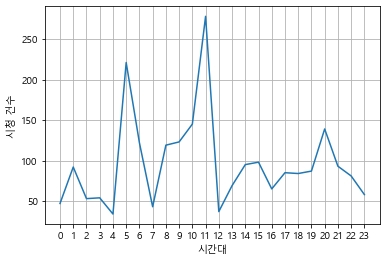

In [508]:
plt.plot(counts2.index, counts2.values)
plt.title('시간대별 지상파/종편 시청 건수')
plt.xlabel('시간대')
plt.ylabel('시청 건수')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

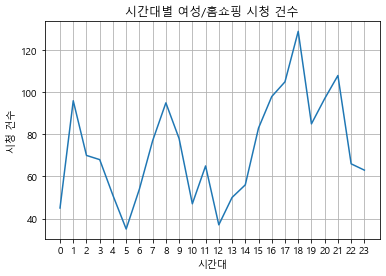

In [510]:
plt.plot(counts3.index, counts3.values)
plt.title('시간대별 여성/홈쇼핑 시청 건수')
plt.xlabel('시간대')
plt.ylabel('시청 건수')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

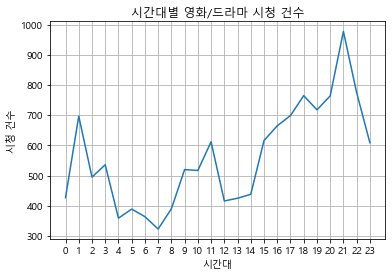

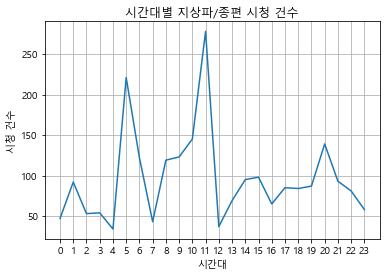

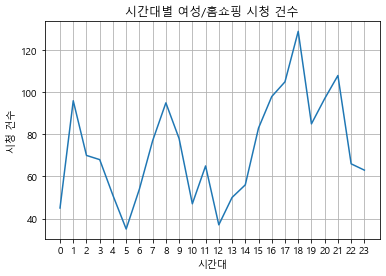

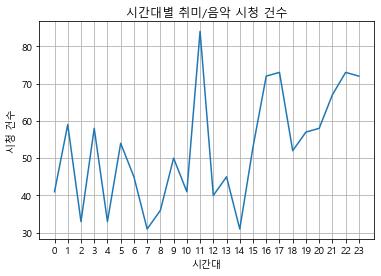

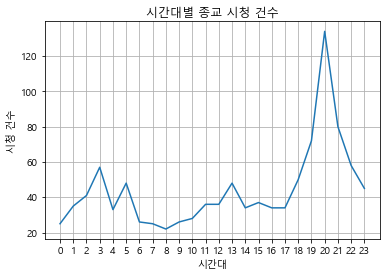

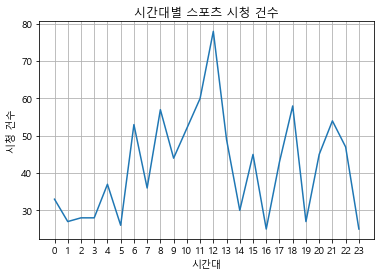

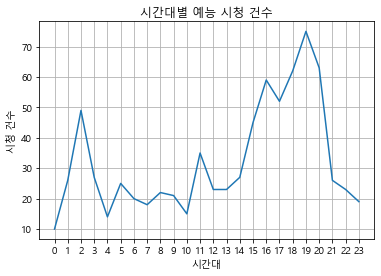

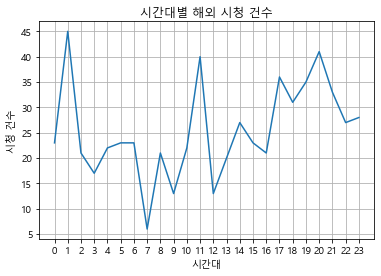

C:\Users\userpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\userpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


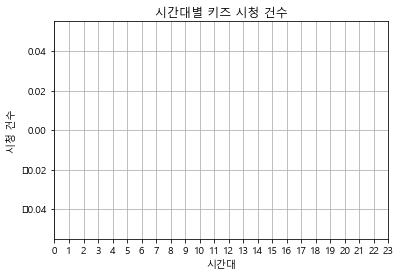

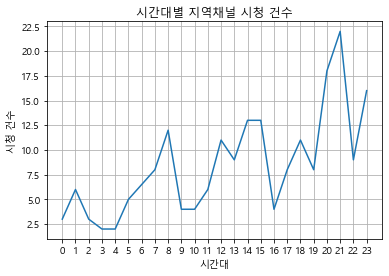

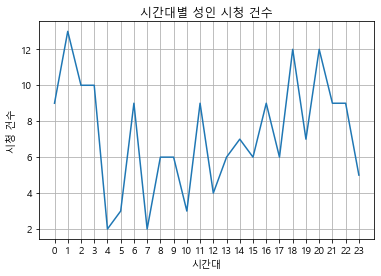

In [530]:
import matplotlib.pyplot as plt

# 데이터프레임과 제목 딕셔너리 생성
dfs = {'counts1': counts1, 'counts2': counts2, 'counts3': counts3, 
      'counts4': counts4, 'counts5': counts5, 'counts6': counts6,
      'counts7': counts7, 'counts8': counts8, 'counts9': counts9,
      'counts10': counts10, 'counts11': counts11}
titles = {'counts1': '시간대별 영화/드라마 시청 건수',
          'counts2': '시간대별 지상파/종편 시청 건수',
          'counts3': '시간대별 여성/홈쇼핑 시청 건수', 
          'counts4': '시간대별 취미/음악 시청 건수',
          'counts5': '시간대별 종교 시청 건수',
          'counts6': '시간대별 스포츠 시청 건수',
          'counts7': '시간대별 예능 시청 건수',
          'counts8': '시간대별 해외 시청 건수',
          'counts9': '시간대별 키즈 시청 건수',
          'counts10': '시간대별 지역채널 시청 건수',
          'counts11': '시간대별 성인 시청 건수',
          }

# 반복문으로 그래프 그리기
for df_name, df in dfs.items():
    plt.plot(df.index, df.values)
    plt.title(titles[df_name])
    plt.xlabel('시간대')
    plt.ylabel('시청 건수')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.show()


In [532]:
channel.to_csv('channel.csv')